In [1]:
# Horray libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.linear_model import LogisticRegression

In [2]:
batch_size = 32
img_height = 180
img_width = 180

In [3]:
from src import make_test_train

In [16]:
test, train = make_test_train()

Found 5072 files belonging to 2 classes.
Found 502 files belonging to 2 classes.


In [5]:
# Data augmentation

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


In [6]:
preprocess_input = layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))

In [7]:
base_model = tf.keras.applications.ResNet152V2(input_shape=(img_height, img_width, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)

234553344/234545216 [==============================] - 48s 0us/step


In [15]:
def initialize_model():
    inputs = tf.keras.Input(shape=(img_height, img_width, 3))
    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = base_model(x, training=False)
    x = global_average_layer(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs)
    base_learning_rate = 0.00001

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

In [18]:
model = initialize_model()

epochs=100
history = model.fit(
    train,
    validation_data=test,
    epochs=epochs
)
test_preds = model.predict(test)
# test_preds.to_csv(ideally with image names, definately with the actual labels)
train_preds = model.predict(train)
# train_preds.to_csv(ideally with image names, definately with the actual labels)

Epoch 1/100
159/159 [==============================] - 308s 2s/step - loss: 0.5106 - accuracy: 0.7364 - val_loss: 0.7055 - val_accuracy: 0.5478
Epoch 2/100
159/159 [==============================] - 316s 2s/step - loss: 0.4909 - accuracy: 0.7541 - val_loss: 0.6961 - val_accuracy: 0.5518
Epoch 3/100
159/159 [==============================] - 316s 2s/step - loss: 0.4837 - accuracy: 0.7530 - val_loss: 0.6766 - val_accuracy: 0.5578
Epoch 4/100
159/159 [==============================] - 317s 2s/step - loss: 0.4672 - accuracy: 0.7713 - val_loss: 0.6644 - val_accuracy: 0.5618
Epoch 5/100
159/159 [==============================] - 312s 2s/step - loss: 0.4581 - accuracy: 0.7794 - val_loss: 0.6578 - val_accuracy: 0.5637
Epoch 6/100
159/159 [==============================] - 312s 2s/step - loss: 0.4489 - accuracy: 0.7894 - val_loss: 0.6450 - val_accuracy: 0.5657
Epoch 7/100
159/159 [==============================] - 313s 2s/step - loss: 0.4352 - accuracy: 0.7928 - val_loss: 0.6378 - val_accuracy:

ValueError: Classification metrics can't handle a mix of binary and continuous targets

model.predict(test.take(6))

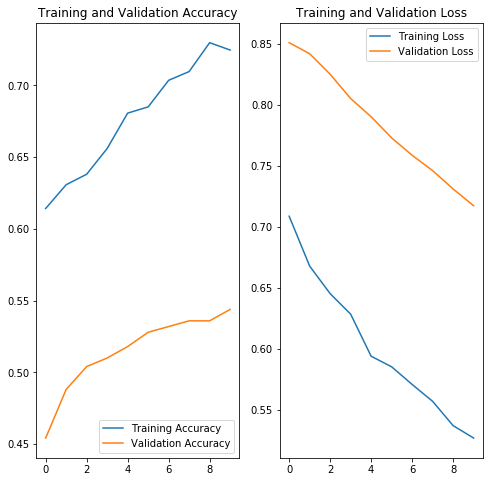

In [17]:
# Results visualisations
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

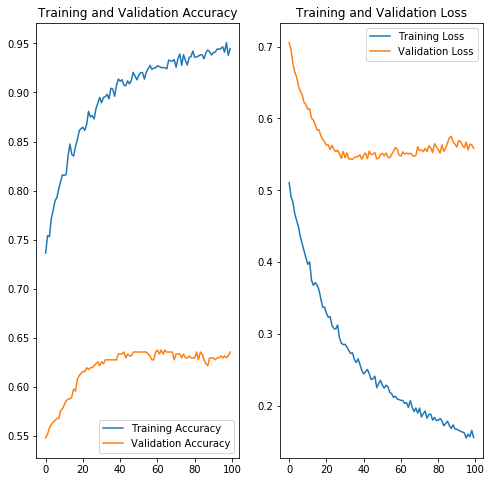

In [19]:
# Results visualisations after ResNet152V2
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

test_labels = np.concatenate([y for x, y in test], axis=0)

cm = confusion_matrix(test_labels, test_preds)
cm

ValueError: Classification metrics can't handle a mix of binary and continuous targets